In [2]:
# Imports

from __future__ import print_function
import time
import sys

import pandas as pd
import numpy as np

from sklearn import linear_model
from sklearn.utils.testing import ignore_warnings
from sklearn.exceptions import ConvergenceWarning
from sklearn.utils import shuffle
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression, RidgeCV, LassoCV, ElasticNetCV
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score, mean_squared_error
from scipy.stats import skew
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier


from sklearn.tree import DecisionTreeClassifier
from IPython.display import display
import matplotlib.pyplot as plt

import seaborn as sns

print(__doc__)

# Import operator for dictionary sorting operations
import operator
import warnings

# Definitions
pd.set_option('display.float_format', lambda x: '%.3f' % x)
%matplotlib inline

Automatically created module for IPython interactive environment


In [3]:
# Load dataset
# train = pd.read_csv('./AmesDummies.csv')
train = pd.read_csv('./AmesDummiesOrdinal.csv', index_col=0)

In [4]:
col = train.columns
col

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea',
       ...
       'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence'],
      dtype='object', length=186)

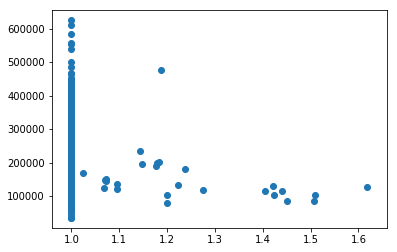

In [5]:
plt.scatter(train['PropAboveGroundSF'], train['SalePrice'])

(array([  5.,   6.,  11.,  24.,  50.,  45.,  93., 123., 161., 117., 106.,
        111., 101.,  79.,  48.,  54.,  55.,  39.,  32.,  31.,  29.,  19.,
         12.,  20.,  16.,  11.,   6.,   4.,   7.,   9.,   6.,   5.,   2.,
          3.,   4.,   1.,   2.,   1.,   1.,   1.,   0.,   0.,   1.,   0.,
          2.,   0.,   1.,   0.,   1.,   1.]),
 array([ 34900.,  46702.,  58504.,  70306.,  82108.,  93910., 105712.,
        117514., 129316., 141118., 152920., 164722., 176524., 188326.,
        200128., 211930., 223732., 235534., 247336., 259138., 270940.,
        282742., 294544., 306346., 318148., 329950., 341752., 353554.,
        365356., 377158., 388960., 400762., 412564., 424366., 436168.,
        447970., 459772., 471574., 483376., 495178., 506980., 518782.,
        530584., 542386., 554188., 565990., 577792., 589594., 601396.,
        613198., 625000.]),
 <a list of 50 Patch objects>)

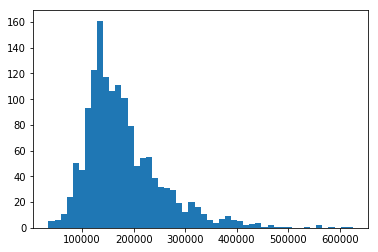

In [6]:
plt.hist(train['SalePrice'], bins = 50)

In [7]:
PureCategorical = ['MSSubClass', 'MSZoning', 'Street', 'Alley', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood',
                  'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Foundation', 'MasVnrType', 'Heating', 'CentralAir', 'Electrical',
                  'GarageType', 'SaleType','SaleCondition']
QuesCategorical = ['LotShape', 'Utilities']
OrdCategorical = ['OverallQual', 'OverallCond', 'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
                 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish', 'GarageQual', 'GarageCond',
                 'PavedDrive', 'PoolQC','Fence']
JointFeatures = ['Condition1', 'Condition2', 'Exterior1st', 'Exterior2nd']
Numerical = ['LotFrontage', 'LotArea', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtScore', 'TotalBsmtSF', 'TotalSF',
            'PctLowQual', 'AboveGroundPct', 'TotalBath', 'Bedroom', 'Kitchen', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt',
            'GarageCars','GarageArea','WoodDeckSF','OpenPorchSF','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea',
            'MiscVal', 'MoSold', 'YrSold', 'SalePrice']

In [8]:
col = ['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street', 'Alley', 'LotShape', 
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 
       'Condition2', 'BldgType', 'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 
       'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea', 
       'ExterQual', 'ExterCond', 'Foundation', 
       'BsmtQual', 'BsmtCond', 
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 
       'Heating', 'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 
       'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'Fence', 'MiscFeature', 'MiscVal', 'MoSold', 'YrSold', 
       'SaleType', 'SaleCondition', 'SalePrice']

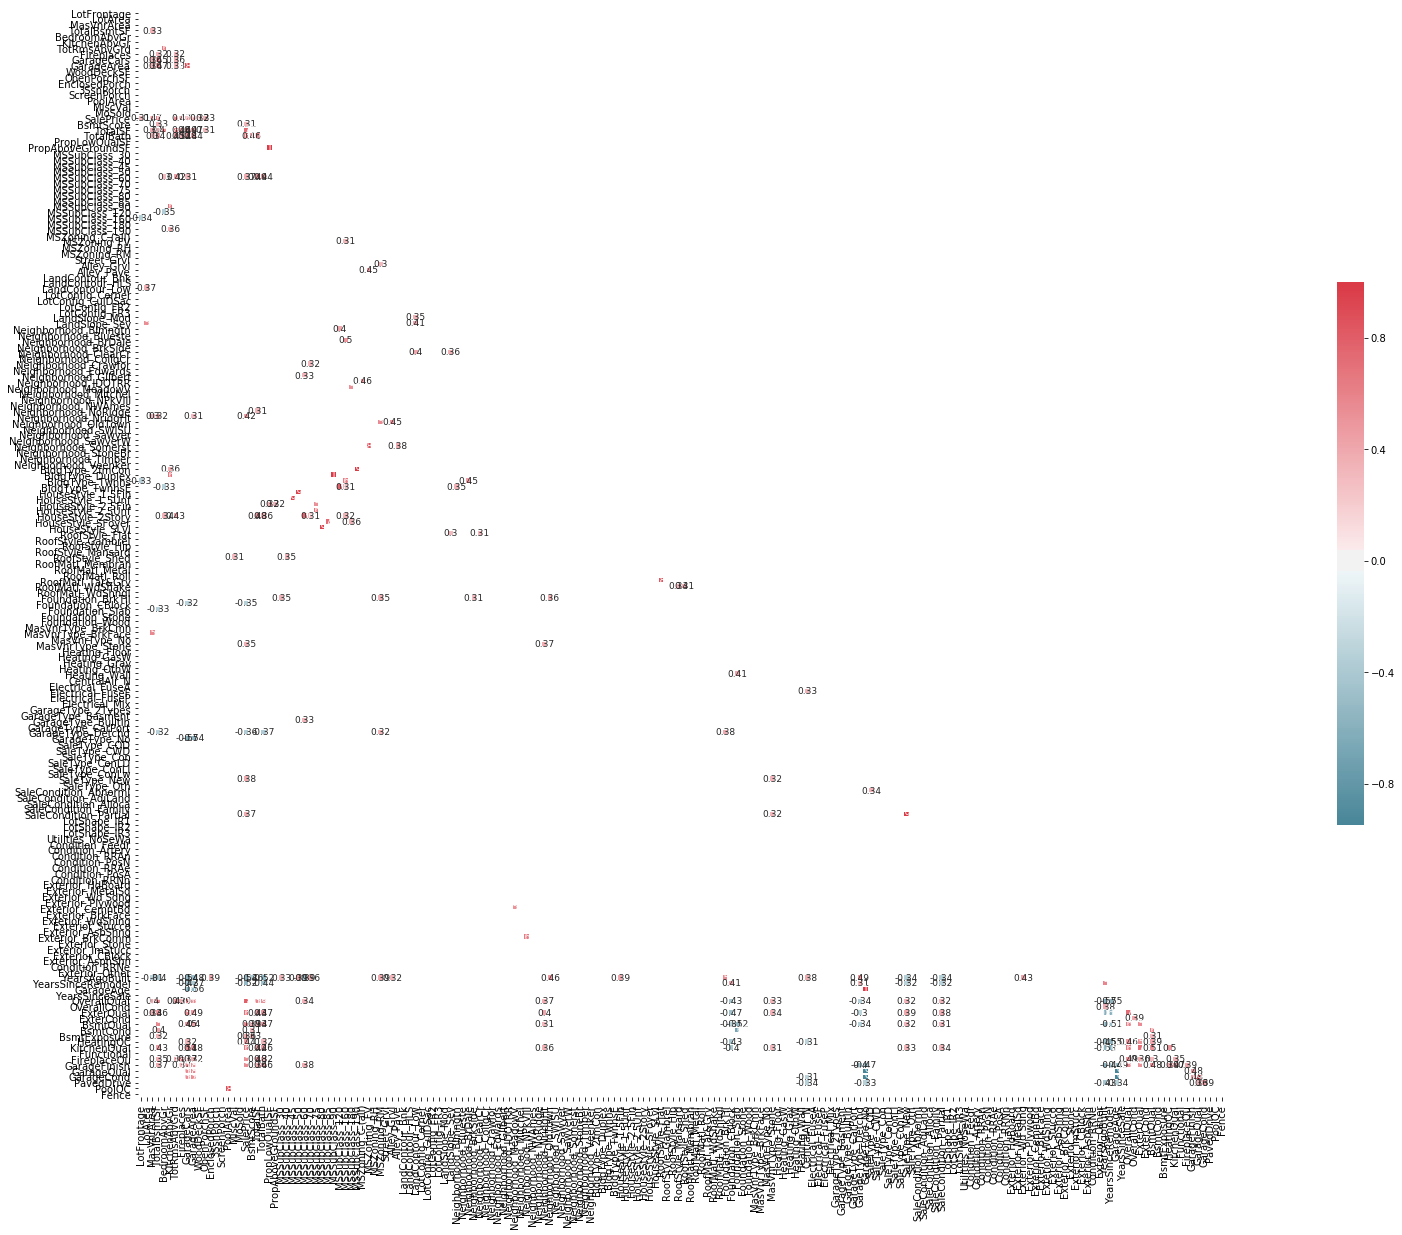

In [9]:
corr = train.corr()
f, ax = plt.subplots(figsize=(40,20))
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr[(corr > 0.3) | (corr < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

In [11]:
corr[(corr > 0.2) | (corr < -0.2)]['SalePrice'].sort_values(ascending=False).iloc[:51]

SalePrice                1.000
OverallQual              0.801
TotalSF                  0.730
ExterQual                0.695
KitchenQual              0.666
GarageCars               0.649
TotalBsmtSF              0.647
GarageArea               0.637
TotalBath                0.636
BsmtQual                 0.592
GarageFinish             0.557
TotRmsAbvGrd             0.537
FireplaceQu              0.529
MasVnrArea               0.475
Fireplaces               0.467
HeatingQC                0.435
Neighborhood_NridgHt     0.420
SaleType_New             0.377
MSSubClass_60            0.373
SaleCondition_Partial    0.371
BsmtExposure             0.360
MasVnrType_Stone         0.349
OpenPorchSF              0.330
WoodDeckSF               0.323
BsmtScore                0.313
LotFrontage              0.308
Neighborhood_NoRidge     0.290
GarageQual               0.281
GarageCond               0.270
LotArea                  0.270
GarageType_BuiltIn       0.248
RoofStyle_Hip            0.238
HouseSty

In [12]:
OverallQual              0.801
TotalSF                  0.730
ExterQual                0.695
KitchenQual              0.666
GarageCars               0.649
TotalBsmtSF              0.647
GarageArea               0.637
TotalBath                0.636
BsmtQual                 0.592
GarageFinish             0.557
TotRmsAbvGrd             0.537
FireplaceQu              0.529
MasVnrArea               0.475
Fireplaces               0.467
HeatingQC                0.435
Neighborhood_NridgHt     0.420
SaleType_New             0.377
MSSubClass_60            0.373
SaleCondition_Partial    0.371
BsmtExposure             0.360
MasVnrType_Stone         0.349
OpenPorchSF              0.330
WoodDeckSF               0.323
BsmtScore                0.313
LotFrontage              0.308
Neighborhood_NoRidge     0.290
GarageQual               0.281
GarageCond               0.270
LotArea                  0.270
GarageType_BuiltIn       0.248
RoofStyle_Hip            0.238
HouseStyle_2Story        0.237
PavedDrive               0.237
Neighborhood_StoneBr     0.225
BsmtCond                 0.219
LotShape_IR1             0.217
MasVnrType_BrkFace       0.201
Foundation_BrkTil       -0.208
GarageType_No           -0.243
MSSubClass_30           -0.245
CentralAir_N            -0.258
GarageAge               -0.268
MSZoning_RM             -0.295
Foundation_CBlock       -0.348
GarageType_Detchd       -0.361
YearsSinceRemodel       -0.521
YearsAgoBuilt           -0.535

SyntaxError: invalid syntax (<ipython-input-12-a0f171fcfc31>, line 1)

In [13]:
corr.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr.SalePrice)

SalePrice                1.000
OverallQual              0.801
TotalSF                  0.730
ExterQual                0.695
KitchenQual              0.666
GarageCars               0.649
TotalBsmtSF              0.647
GarageArea               0.637
TotalBath                0.636
BsmtQual                 0.592
GarageFinish             0.557
TotRmsAbvGrd             0.537
FireplaceQu              0.529
MasVnrArea               0.475
Fireplaces               0.467
HeatingQC                0.435
Neighborhood_NridgHt     0.420
SaleType_New             0.377
MSSubClass_60            0.373
SaleCondition_Partial    0.371
BsmtExposure             0.360
MasVnrType_Stone         0.349
OpenPorchSF              0.330
WoodDeckSF               0.323
BsmtScore                0.313
LotFrontage              0.308
Neighborhood_NoRidge     0.290
GarageQual               0.281
GarageCond               0.270
LotArea                  0.270
                         ...  
BldgType_Duplex         -0.117
MSSubCla

In [14]:
corr.SalePrice[:22]

SalePrice               1.000
OverallQual             0.801
TotalSF                 0.730
ExterQual               0.695
KitchenQual             0.666
GarageCars              0.649
TotalBsmtSF             0.647
GarageArea              0.637
TotalBath               0.636
BsmtQual                0.592
GarageFinish            0.557
TotRmsAbvGrd            0.537
FireplaceQu             0.529
MasVnrArea              0.475
Fireplaces              0.467
HeatingQC               0.435
Neighborhood_NridgHt    0.420
SaleType_New            0.377
MSSubClass_60           0.373
SaleCondition_Partial   0.371
BsmtExposure            0.360
MasVnrType_Stone        0.349
Name: SalePrice, dtype: float64

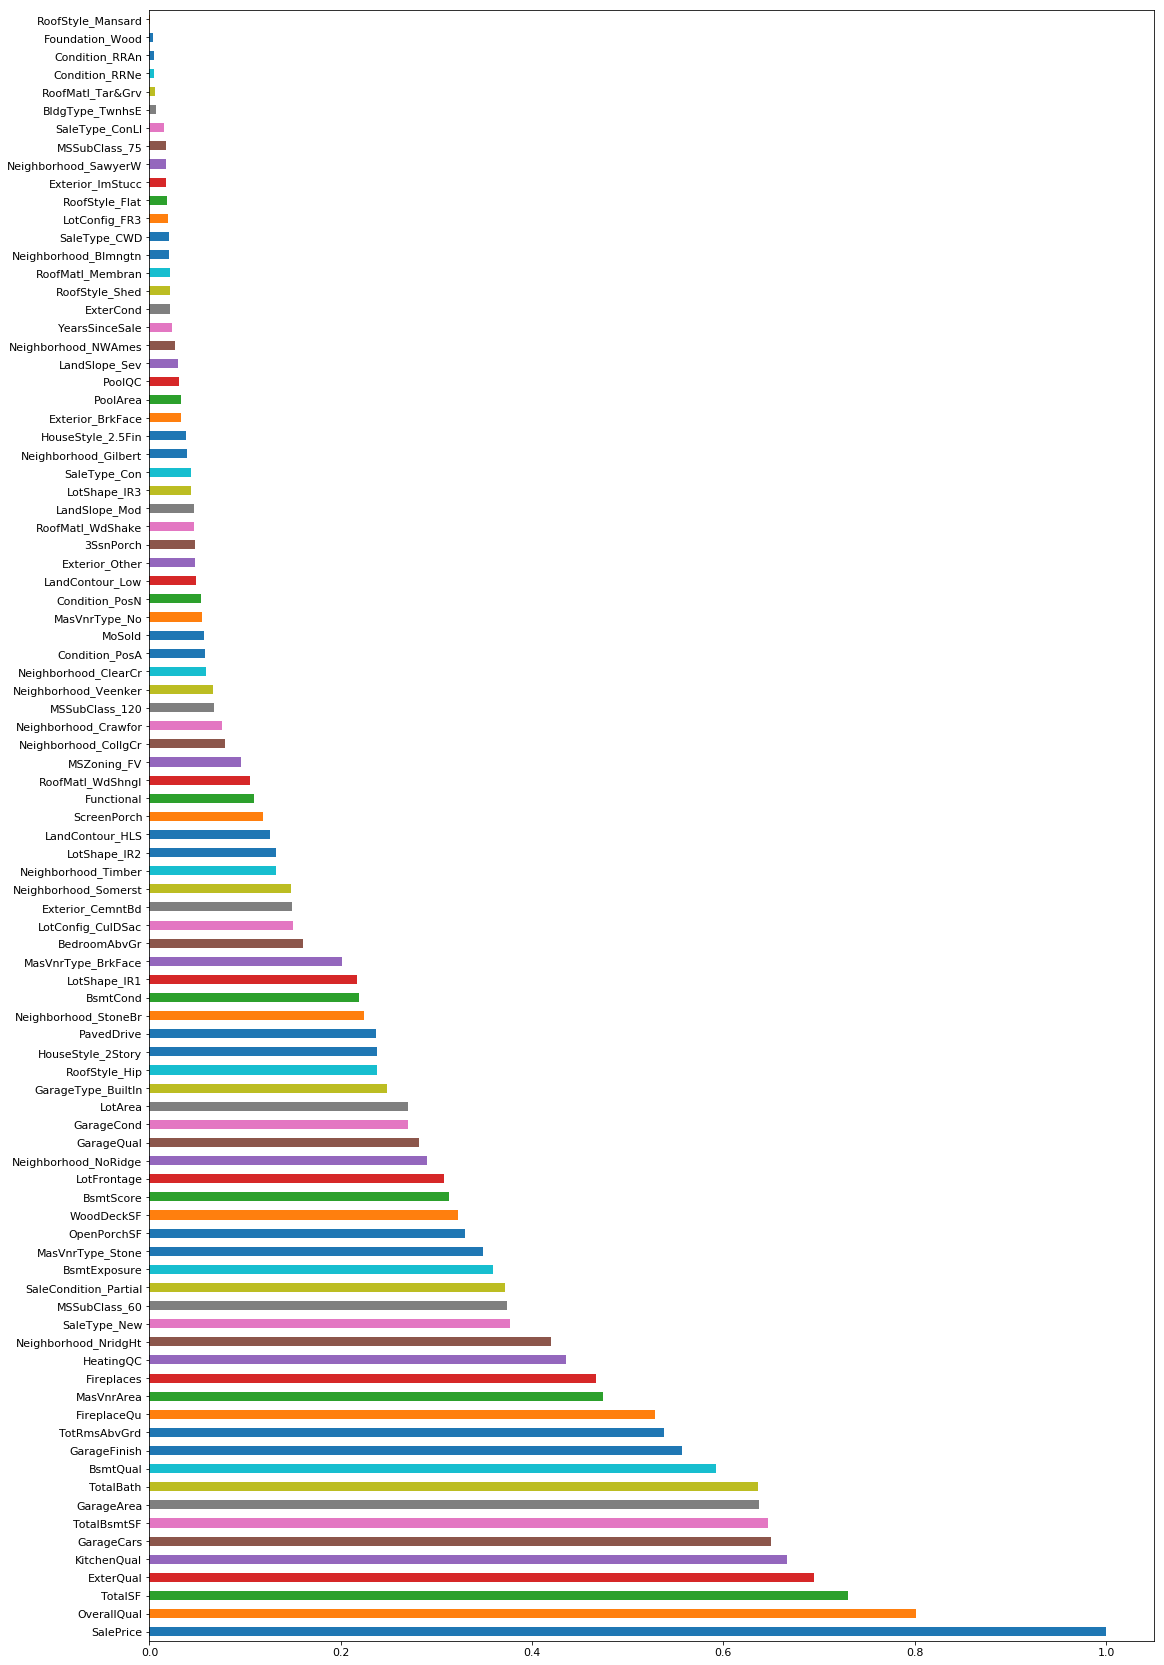

In [15]:
plt.figure(figsize=(18, 30))
c = pd.Series(corr['SalePrice'])
pos = c[corr['SalePrice'] >= 0]
# c.plot(kind="barh", fontsize = 11)
pos.plot(kind='barh', fontsize = 11)

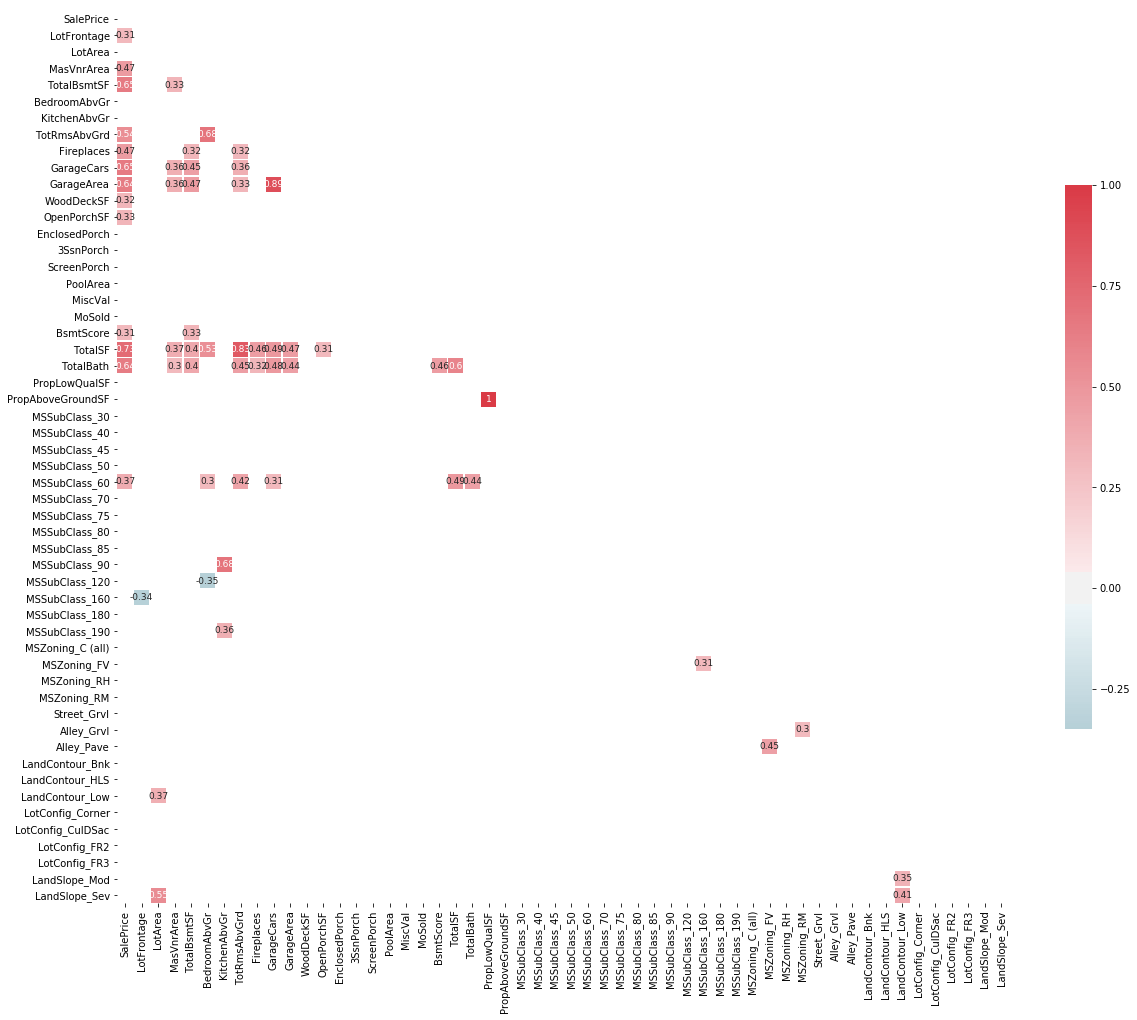

In [16]:
explore1 = train[['SalePrice', 'LotFrontage', 'LotArea', 'MasVnrArea', 'TotalBsmtSF', 'BedroomAbvGr',
       'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold',
       'BsmtScore', 'TotalSF', 'TotalBath', 'PropLowQualSF',
       'PropAboveGroundSF', 'MSSubClass_30', 'MSSubClass_40', 'MSSubClass_45',
       'MSSubClass_50', 'MSSubClass_60', 'MSSubClass_70', 'MSSubClass_75',
       'MSSubClass_80', 'MSSubClass_85', 'MSSubClass_90', 'MSSubClass_120',
       'MSSubClass_160', 'MSSubClass_180', 'MSSubClass_190',
       'MSZoning_C (all)', 'MSZoning_FV', 'MSZoning_RH', 'MSZoning_RM',
       'Street_Grvl', 'Alley_Grvl', 'Alley_Pave', 'LandContour_Bnk',
       'LandContour_HLS', 'LandContour_Low', 'LotConfig_Corner',
       'LotConfig_CulDSac', 'LotConfig_FR2', 'LotConfig_FR3', 'LandSlope_Mod',
       'LandSlope_Sev']]
corr1 = explore1.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr1, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr1[(corr1 > 0.3)| (corr1 < -0.3)], mask=mask, cmap=cmap,
            xticklabels=corr1.columns.values,
            yticklabels=corr1.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

SalePrice               1.000
Neighborhood_NridgHt    0.420
Neighborhood_NoRidge    0.290
RoofStyle_Hip           0.238
HouseStyle_2Story       0.237
Neighborhood_StoneBr    0.225
Neighborhood_Somerst    0.148
Neighborhood_Timber     0.133
Neighborhood_CollgCr    0.079
Neighborhood_Crawfor    0.076
Neighborhood_Veenker    0.067
Neighborhood_ClearCr    0.059
Neighborhood_Gilbert    0.040
HouseStyle_2.5Fin       0.039
Neighborhood_NWAmes     0.027
RoofStyle_Shed          0.022
RoofMatl_Membran        0.021
Neighborhood_Blmngtn    0.021
RoofStyle_Flat          0.018
Neighborhood_SawyerW    0.017
BldgType_TwnhsE         0.007
RoofMatl_Tar&Grv        0.006
RoofStyle_Mansard       0.000
RoofMatl_Metal         -0.000
RoofMatl_Roll          -0.015
Neighborhood_Blueste   -0.021
HouseStyle_2.5Unf      -0.026
RoofStyle_Gambrel      -0.036
HouseStyle_SLvl        -0.038
Neighborhood_NPkVill   -0.039
Neighborhood_Mitchel   -0.058
Neighborhood_SWISU     -0.065
HouseStyle_1.5Unf      -0.090
HouseStyle

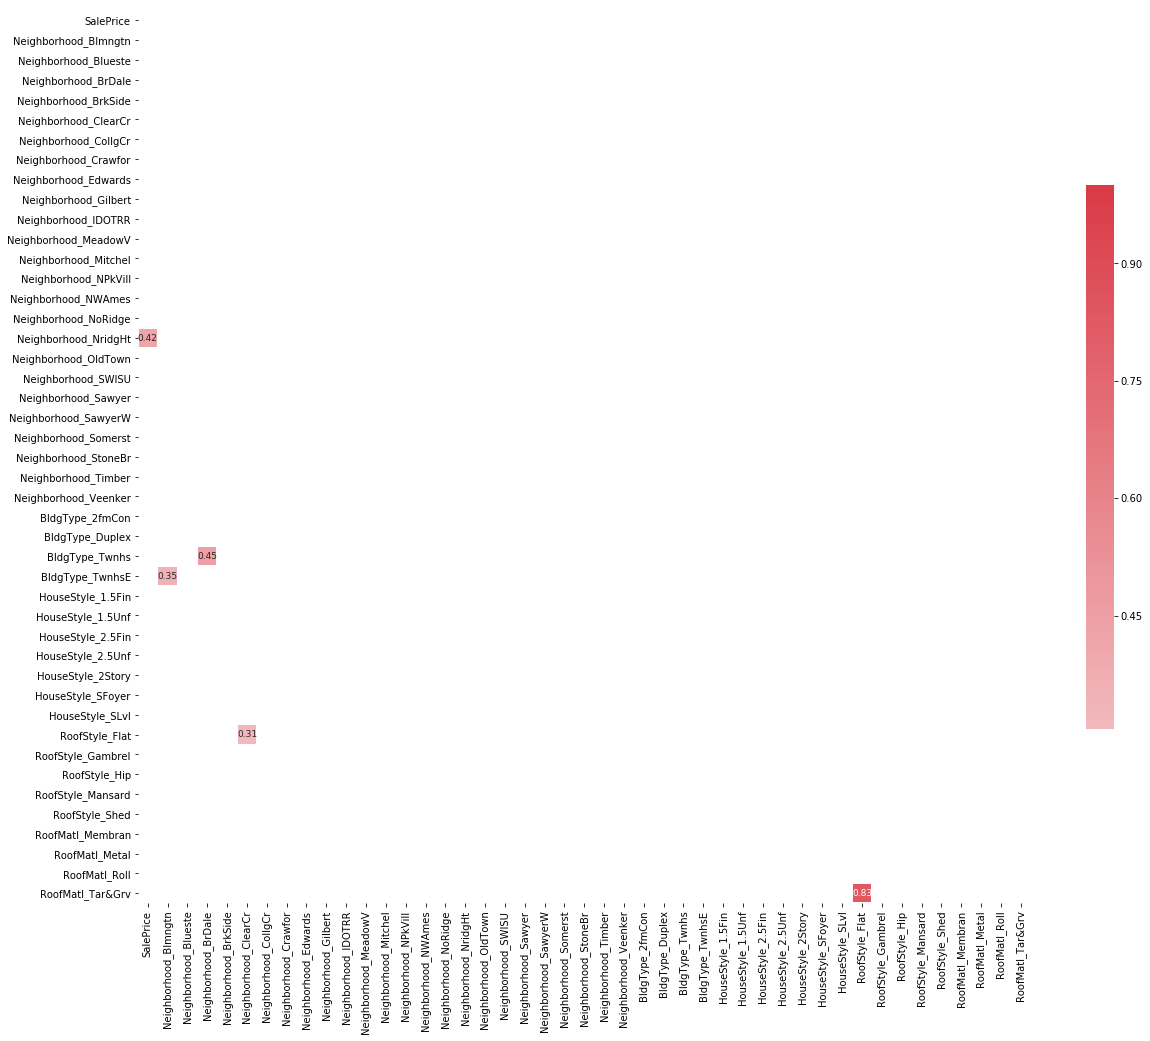

In [20]:
explore2 = train[['SalePrice', 'Neighborhood_Blmngtn', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_ClearCr',
       'Neighborhood_CollgCr', 'Neighborhood_Crawfor', 'Neighborhood_Edwards',
       'Neighborhood_Gilbert', 'Neighborhood_IDOTRR', 'Neighborhood_MeadowV',
       'Neighborhood_Mitchel', 'Neighborhood_NPkVill', 'Neighborhood_NWAmes',
       'Neighborhood_NoRidge', 'Neighborhood_NridgHt', 'Neighborhood_OldTown',
       'Neighborhood_SWISU', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_Somerst', 'Neighborhood_StoneBr', 'Neighborhood_Timber',
       'Neighborhood_Veenker', 'BldgType_2fmCon', 'BldgType_Duplex',
       'BldgType_Twnhs', 'BldgType_TwnhsE', 'HouseStyle_1.5Fin',
       'HouseStyle_1.5Unf', 'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf',
       'HouseStyle_2Story', 'HouseStyle_SFoyer', 'HouseStyle_SLvl',
       'RoofStyle_Flat', 'RoofStyle_Gambrel', 'RoofStyle_Hip',
       'RoofStyle_Mansard', 'RoofStyle_Shed',
       'RoofMatl_Membran', 'RoofMatl_Metal', 'RoofMatl_Roll',
       'RoofMatl_Tar&Grv']]
corr2 = explore2.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr2, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr2[(corr2 > 0.3)| (corr2 < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=corr2.columns.values,
            yticklabels=corr2.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})

corr2.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr2.SalePrice)

SalePrice                1.000
SaleType_New             0.377
SaleCondition_Partial    0.371
MasVnrType_Stone         0.349
GarageType_BuiltIn       0.248
LotShape_IR1             0.217
MasVnrType_BrkFace       0.201
LotShape_IR2             0.133
RoofMatl_WdShngl         0.105
MasVnrType_No            0.055
RoofMatl_WdShake         0.047
LotShape_IR3             0.043
SaleType_Con             0.043
SaleType_CWD             0.021
SaleType_ConLI           0.015
Foundation_Wood          0.003
Foundation_Stone        -0.012
Utilities_NoSeWa        -0.015
SaleCondition_Alloca    -0.015
Heating_GasW            -0.020
GarageType_2Types       -0.024
Heating_OthW            -0.026
SaleType_ConLw          -0.028
GarageType_Basment      -0.029
SaleType_Oth            -0.036
Heating_Floor           -0.037
Electrical_Mix          -0.039
SaleType_ConLD          -0.043
MasVnrType_BrkCmn       -0.045
SaleCondition_Family    -0.047
Electrical_FuseP        -0.049
SaleCondition_AdjLand   -0.052
Heating_

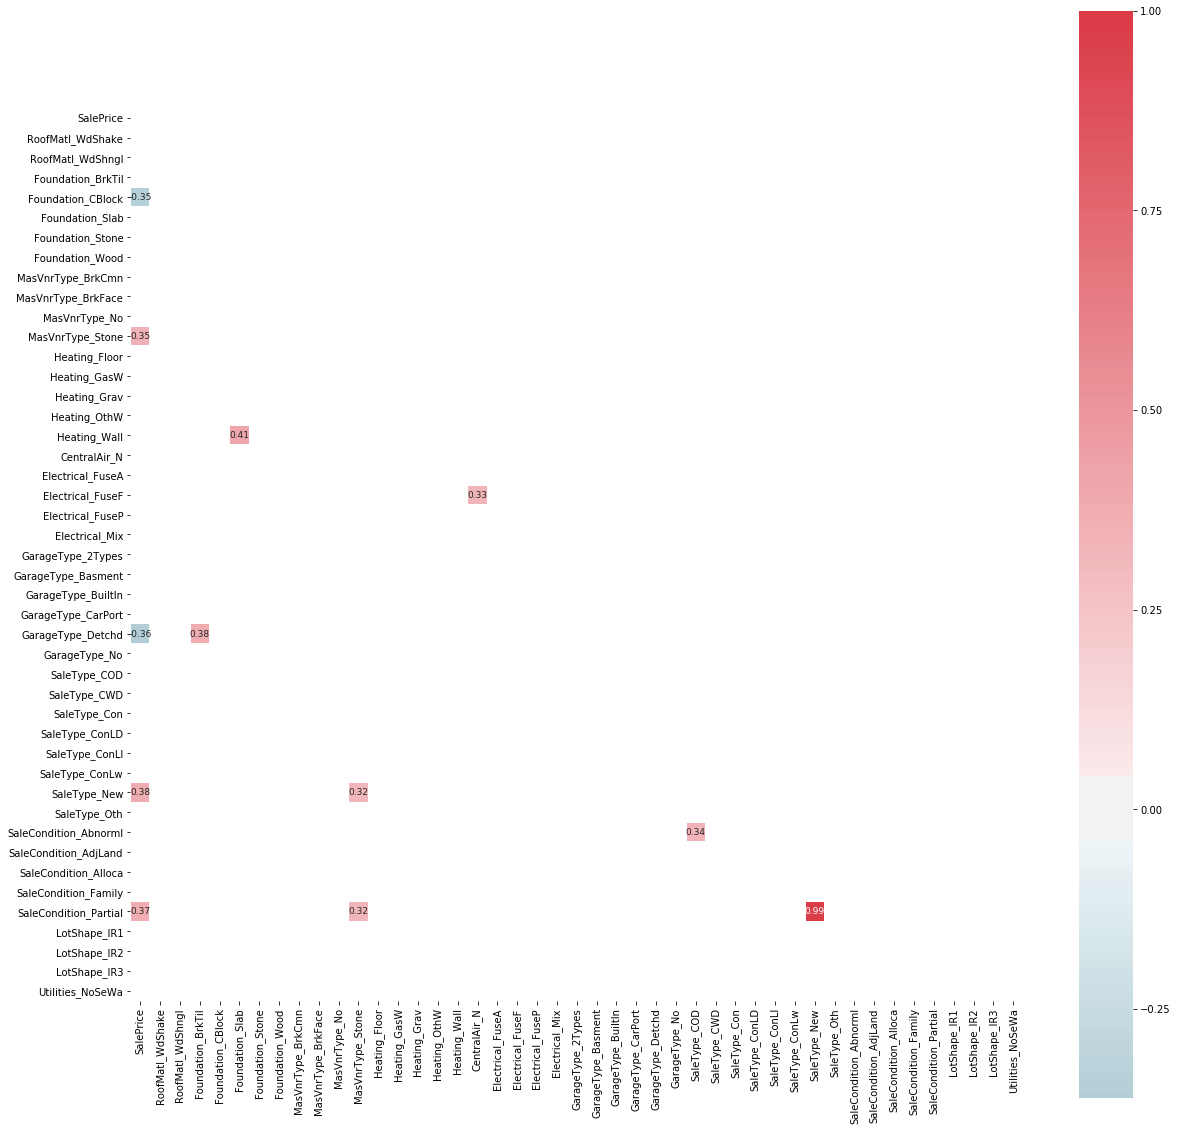

In [21]:
explore3 = train[['SalePrice','RoofMatl_WdShake', 'RoofMatl_WdShngl', 'Foundation_BrkTil',
       'Foundation_CBlock', 'Foundation_Slab', 'Foundation_Stone',
       'Foundation_Wood', 'MasVnrType_BrkCmn', 'MasVnrType_BrkFace',
       'MasVnrType_No', 'MasVnrType_Stone', 'Heating_Floor', 'Heating_GasW',
       'Heating_Grav', 'Heating_OthW', 'Heating_Wall', 'CentralAir_N',
       'Electrical_FuseA', 'Electrical_FuseF', 'Electrical_FuseP',
       'Electrical_Mix', 'GarageType_2Types', 'GarageType_Basment',
       'GarageType_BuiltIn', 'GarageType_CarPort', 'GarageType_Detchd',
       'GarageType_No', 'SaleType_COD', 'SaleType_CWD', 'SaleType_Con',
       'SaleType_ConLD', 'SaleType_ConLI', 'SaleType_ConLw', 'SaleType_New',
       'SaleType_Oth', 'SaleCondition_Abnorml', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Partial',
       'LotShape_IR1', 'LotShape_IR2', 'LotShape_IR3', 'Utilities_NoSeWa']]
corr3 = explore3.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr3, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr3[(corr3 > 0.3)| (corr3 < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=corr3.columns.values,
            yticklabels=corr3.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9})
corr3.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr3.SalePrice)

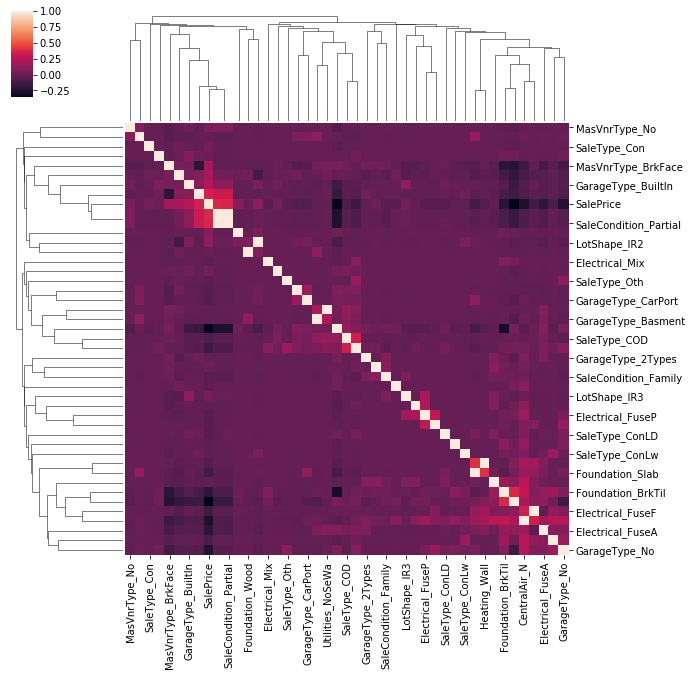

In [29]:
sns.clustermap(corr3, metric='correlation')

SalePrice       1.000
OverallQual     0.801
ExterQual       0.695
KitchenQual     0.666
KitchenQual     0.666
GarageFinish    0.557
FireplaceQu     0.529
HeatingQC       0.435
HeatingQC       0.435
BsmtExposure    0.360
GarageQual      0.281
GarageCond      0.270
PavedDrive      0.237
BsmtCond        0.219
Functional      0.109
Functional      0.109
PoolQC          0.031
ExterCond       0.022
OverallCond    -0.080
Fence          -0.161
Name: SalePrice, dtype: float64


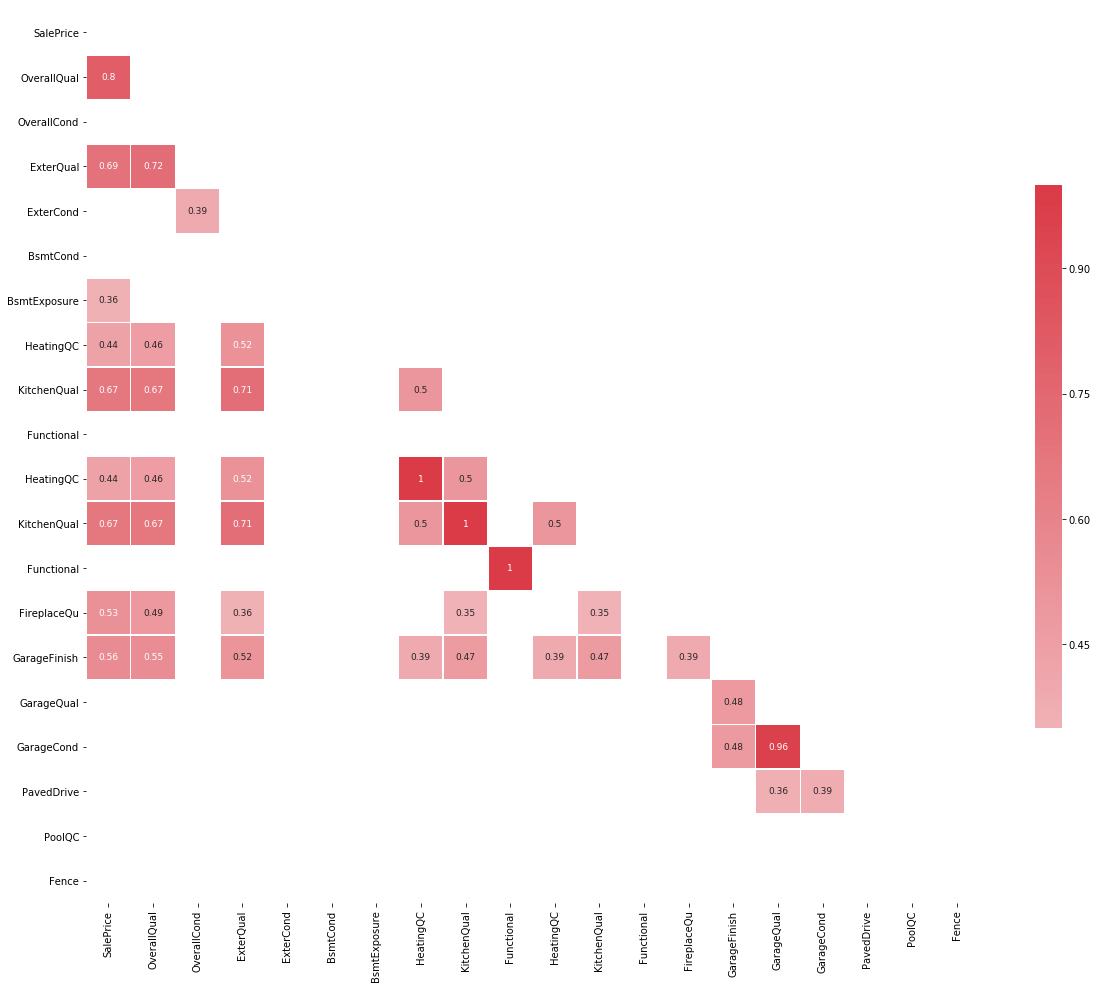

In [22]:
explore4 = train[['SalePrice','OverallQual', 'OverallCond','ExterQual', 'ExterCond', 'BsmtCond',
       'BsmtExposure', 'HeatingQC', 'KitchenQual',
       'Functional', 'HeatingQC', 'KitchenQual', 'Functional', 'FireplaceQu', 'GarageFinish',
       'GarageQual', 'GarageCond', 'PavedDrive', 'PoolQC', 'Fence']]
corr4 = explore4.corr()
f, ax = plt.subplots(figsize=(20,20))
mask = np.zeros_like(corr4, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr4[(corr4 > 0.3)| (corr4 < -0.3)], mask=mask, cmap=cmap, 
            xticklabels=corr4.columns.values,
            yticklabels=corr4.columns.values,
            center=0,
            square=True, linewidths=.5, annot=True, annot_kws={'size': 9}, cbar_kws={"shrink": .5})
corr4.sort_values(["SalePrice"], ascending = False, inplace = True)
print(corr4.SalePrice)

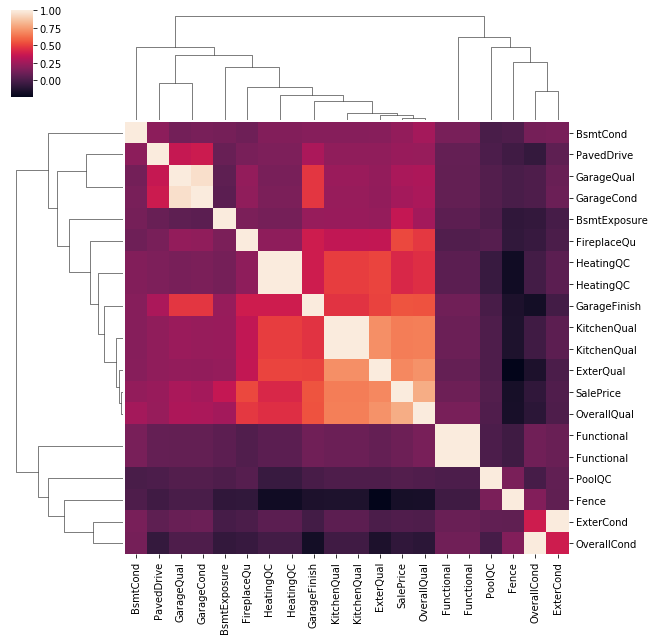

In [28]:
sns.clustermap(corr4, metric='correlation')

In [17]:
X = train.drop('SalePrice', axis = 1)
y = train['SalePrice']

In [18]:
# Load the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,
                                                    random_state=0)

In [19]:
@ignore_warnings(category=ConvergenceWarning)

def fit_and_score(estimator, max_iter, X_train, X_test, y_train, y_test):
    """Fit the estimator on the train set and score it on both sets"""
    estimator.set_params(max_iter=max_iter)
    estimator.set_params(random_state=0)

    start = time.time()
    estimator.fit(X_train, y_train)

    fit_time = time.time() - start
    n_iter = estimator.n_iter_
    train_score = estimator.score(X_train, y_train)
    test_score = estimator.score(X_test, y_test)

    return fit_time, n_iter, train_score, test_score

In [20]:
# Define the estimators to compare
estimator_dict = {'No stopping criterion': linear_model.SGDClassifier(n_iter_no_change=5, tol=None),
                  'Training loss': linear_model.SGDClassifier(early_stopping=False, n_iter_no_change=5, tol=0.1),
                  'Validation score': linear_model.SGDClassifier(early_stopping=True, n_iter_no_change=5, 
                                                                 tol=0.0001, validation_fraction=0.2),
                  'Linear SVM': linear_model.SGDClassifier(n_iter_no_change=5, alpha = 0.05, penalty='l2', loss='hinge'),
            
}

In [ ]:
results = []
for estimator_name, estimator in estimator_dict.items():
    print(estimator_name + ': ', end='')
    for max_iter in range(1, 50):
        print('.', end='')
        sys.stdout.flush()

        fit_time, n_iter, train_score, test_score = fit_and_score(
            estimator, max_iter, X_train, X_test, y_train, y_test)

        results.append((estimator_name, max_iter, fit_time, n_iter,
                        train_score, test_score))
        
        
    print('')

No stopping criterion: .................................................
Training loss: .................................................
Validation score: .................................................
Linear SVM: .........................................

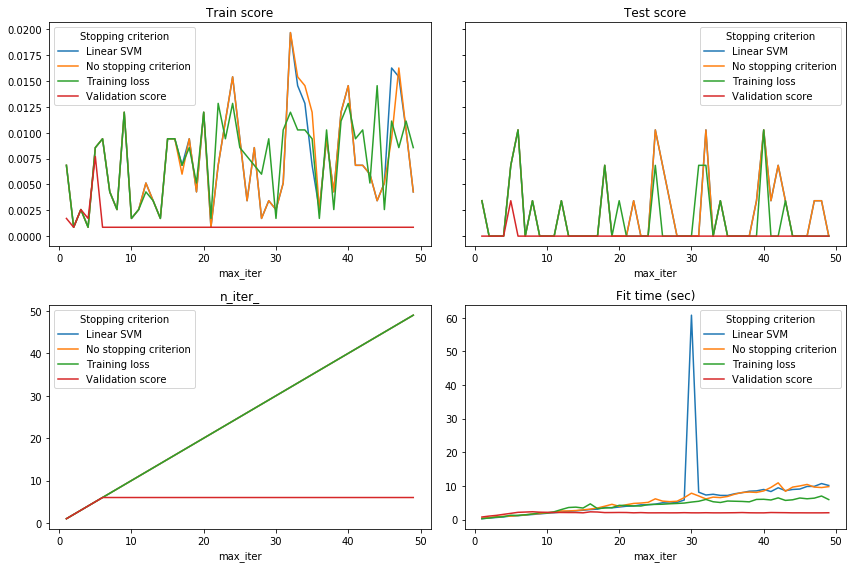

In [20]:
# Transform the results in a pandas dataframe for easy plotting
columns = [
    'Stopping criterion', 'max_iter', 'Fit time (sec)', 'n_iter_',
    'Train score', 'Test score'
]
results_df = pd.DataFrame(results, columns=columns)

# Define what to plot (x_axis, y_axis)
lines = 'Stopping criterion'
plot_list = [
    ('max_iter', 'Train score'),
    ('max_iter', 'Test score'),
    ('max_iter', 'n_iter_'),
    ('max_iter', 'Fit time (sec)'),
]

nrows = 2
ncols = int(np.ceil(len(plot_list) / 2.))
fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(6 * ncols,
                                                            4 * nrows))
axes[0, 0].get_shared_y_axes().join(axes[0, 0], axes[0, 1])

for ax, (x_axis, y_axis) in zip(axes.ravel(), plot_list):
    for criterion, group_df in results_df.groupby(lines):
        group_df.plot(x=x_axis, y=y_axis, label=criterion, ax=ax)
    ax.set_title(y_axis)
    ax.legend(title=lines)

fig.tight_layout()
plt.show()

In [21]:
import numpy as np
from sklearn import linear_model
from sklearn import svm

classifiers = [
    svm.SVR(),
    linear_model.SGDRegressor(),
    linear_model.BayesianRidge(),
    linear_model.LassoLars(),
    linear_model.ARDRegression(),
    linear_model.PassiveAggressiveRegressor(),
    linear_model.TheilSenRegressor(),
    linear_model.LinearRegression()]


for item in classifiers:
    print(item)
    clf = item
    clf.fit(X_train, y_train)
    print(clf.predict(X_test),'\n')

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
  gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
  tol=0.001, verbose=False)


/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


[162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.39996894 162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4        162999.4        162999.4        162999.4
 162999.4     

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in SGDRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[254916.21957666 140787.54296843 119920.20414467 222390.69623168
  91742.33451463  84205.17734622 258521.00827958 134701.47212788
 484706.15827948 161964.2396462  193402.62025964 135433.31785795
 249751.47114664 115788.50541393 128440.40520667 140300.2122681
 254146.22560337 116404.5064774  137271.27166479 181759.49179619
 129568.10186639 151219.7317091  118714.37464915 148472.36554665
 204876.58554543 184805.66459092 163633.1327851   82616.99471662
 305703.34467946 112658.6928972  152682.08853207 205946.48550815
 158617.21746084 299837.80291562 336606.18832307 199520.77302502
 281256.94501372 106949.36216178 224484.58513721 342518.51081947
 201527.47968538 123686.79766717 214878.9377283  302593.36913466
 343678.25096885 132436.27594435 112521.77788664 115291.16766502
 171957.29474996  82717.32423738 391296.55487115 149226.41054111
 178168.88319263  86993.19450406 237326.65631428  98851.17260373
 106872.66064638 235052.27152845 126542.996079   102637.50769215
 149742.6726457  125215.75

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/least_angle.py:311: ConvergenceWarning: Regressors in active set degenerate. Dropping a regressor, after 127 iterations, i.e. alpha=9.098e+00, with an active set of 121 regressors, and the smallest cholesky pivot element being 2.980e-08. Reduce max_iter or increase eps parameters.
  ConvergenceWarning)


[245703.99807443 144743.01597583 117650.77516532 212891.01223821
 102616.30632644  82642.16095471 247858.30414357 142229.93108625
 485044.38982066 148149.33749068 189938.76212563 141152.57405742
 246859.91691028 121152.86802411 128692.04383862 136772.06505181
 269771.47064297 112718.52422518 138598.86923102 187628.2074709
 124967.92635269 150451.72528251 124825.24609262 149128.54404502
 202205.7978057  205083.85411264 165897.6832251   91154.29784097
 294312.89677923 106737.66839913 141484.18810904 202512.36917836
 168599.97114788 312188.48624716 352466.32047578 190228.25582069
 281697.24068872 108915.472853   215179.98555863 351176.55165068
 205321.68987909 120100.69688744 220946.40073731 302593.18946951
 356258.80262351 124961.18345622 117036.91692275 120803.42379685
 167227.08532307  86933.77638192 381045.91342723 142444.10675433
 178618.79541499  77546.27263922 243489.85243837  87620.08707919
 119074.46025931 232448.54583408 127440.73449181  91380.56149529
 154656.6933339  122247.40

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/stochastic_gradient.py:144: FutureWarning: max_iter and tol parameters have been added in PassiveAggressiveRegressor in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


[263930.04165936 133689.00040894 105557.50627367 218291.74291513
  92658.37730476  75599.01833748 256945.81479987 135509.12148393
 346188.00068744 147640.90478723 188030.13270716 134182.68812929
 240187.84788712 113991.1023093  130115.2921683  146521.16579961
 254810.9352902  124707.21215568 140682.82709375 174508.02422565
 124048.18247551 149681.63535975 108856.25595588 147157.36142845
 195455.73135003 171968.77722695 162510.04760128  88510.92271179
 295434.49857664 113804.06002375 154798.44804911 201087.90468917
 149174.15926963 297430.59712083 358567.02298376 203362.20085741
 270707.18285438 113447.42015752 236573.08210638 345534.81543453
 203199.58521339 112035.7688516  204118.43811215 315829.95854642
 341270.77454495 128461.46535507 131920.33892985 123716.00077667
 177448.12734163  63361.87660094 395925.41637535 155004.42804109
 180941.41113909  72605.13334608 221377.81569454 103272.38095574
  94403.52248461 226763.22582033 137797.39901572 105086.62475674
 139121.46806964 131289.7

In [24]:
# Import your necessary dependencies
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

model = LogisticRegression()
rfe = RFE(model, 3)
fit = rfe.fit(X_train, y_train)
print("Num Features: %s" % (fit.n_features_))
print("Selected Features: %s" % (fit.support_))
print("Feature Ranking: %s" % (fit.ranking_))

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver t

/anaconda3/lib/python3.6/site-packages/sklearn/svm/base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the 

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:459: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
/anaconda3/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed

Num Features: 3
Selected Features: [False False False False False False False False False False False False
 False False False False False False False False False  True False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False False False False False False False False False False False
 False False Fal

In [1]:
from sklearn import linear_model

regr = LinearRegression ()
regr.fit(X_train , y_train)
print ’Coeff and intercept:’,
regr.coef_ , regr.intercept_
print ’Testing Score:’, regr.score(X_test , y_test) print ’
Training
MSE: ’,
np.mean (( regr.predict(X_train) - y_train)**2)
print ’Testing MSE: ’,
np.mean (( regr.predict(X_test) - y_test)**2

SyntaxError: Missing parentheses in call to 'print'. Did you mean print(’Coeff and intercept:’, end=" ")? (<ipython-input-1-a2c012f90a85>, line 5)